In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 2)  
# sns.set_theme(style="whitegrid")

# SI 618 Project 1 - Visualization

## Question 1: Vaccination rate and reproduction rate

Is vaccination effectively prevent or ease the spread of COVID (indicated by indicator `reproduction_rate`)?

### Q1-1: Is the distribution of vaccination in 2021 play a part in preventing the spread of COVID comparing to 2020?

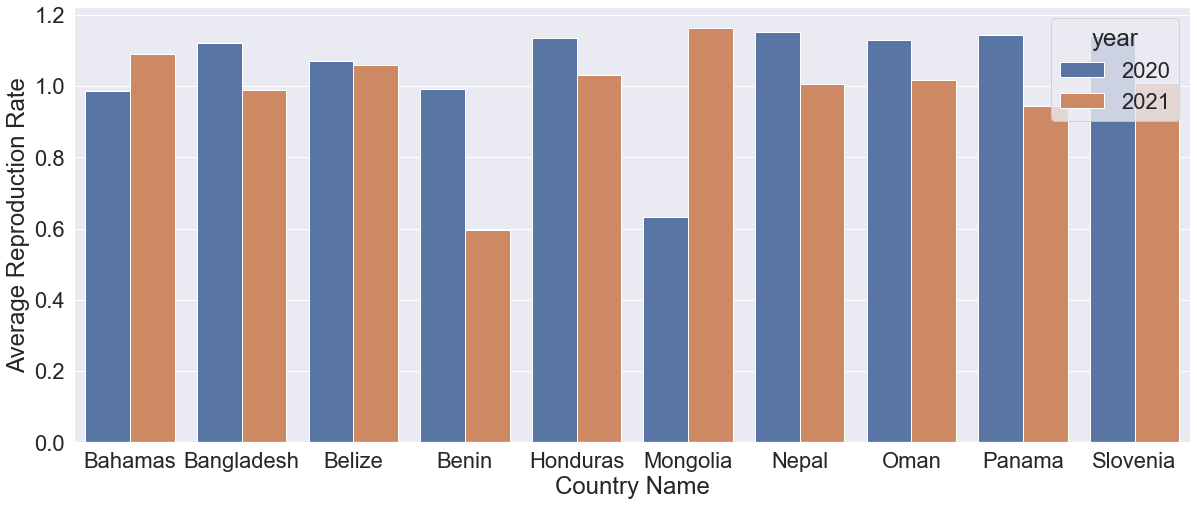

In [2]:
data = pd.read_csv("./result/junqich_si618_project_q1-1.csv", header=None) \
         .rename(columns={0: "country", 1: "year", 2: "reproduction_rate"})
random.seed(5)
sample_countries = random.sample(set(data["country"]), 10)
sample_data = data[[(c in sample_countries) for c in data["country"]]]

plt.figure(figsize=(20,8))
ax = sns.barplot(x="country", 
                 y="reproduction_rate", 
                 hue="year", 
                 data=sample_data)
ax.set(xlabel='Country Name', ylabel='Average Reproduction Rate')
fig = ax.get_figure()
fig.savefig("./figure/Q1-1.png")

### Q1-2: Is a higher vaccination rate relates to a decrease on the COVID spread?

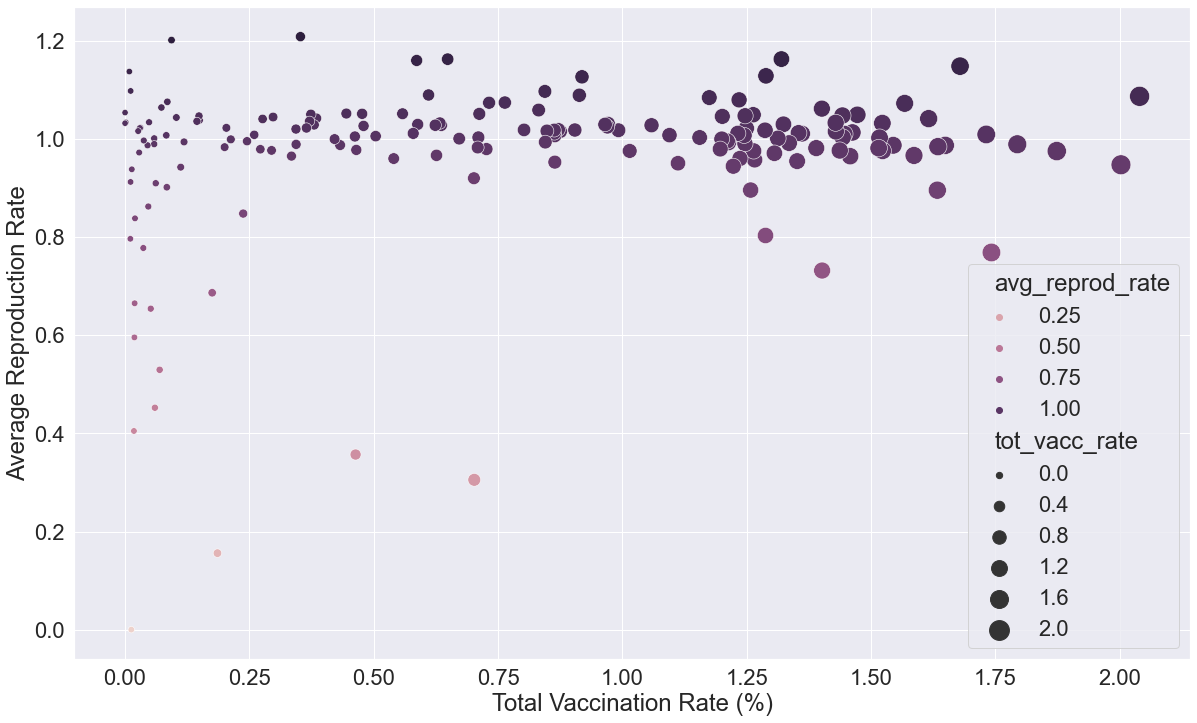

In [3]:
data = pd.read_csv("./result/junqich_si618_project_q1-2.csv", header=None) \
         .rename(columns={0: "country", 1: "year", 2: "avg_reprod_rate", 3: "tot_vacc_rate_ppm"})
data["tot_vacc_rate"] = np.array(list(map(float, [n if n != "None" else "0" for n in data["tot_vacc_rate_ppm"]]))) / 1000000

plt.figure(figsize=(20,12))
ax = sns.scatterplot(x="tot_vacc_rate", 
                     y="avg_reprod_rate",
                     data=data, 
                     size="tot_vacc_rate",
                     sizes=(40, 400),
                     hue=data["avg_reprod_rate"])
ax.set(xlabel='Total Vaccination Rate (%)', ylabel='Average Reproduction Rate')
fig = ax.get_figure()
fig.savefig("./figure/Q1-2.png")

## Question 2: Vaccination rate and stringency index

Is vaccination rate affect the COVID policy of government (indicated by indicator `stringency_index`) ?

### Q2-1: Is the distribution of vaccination in 2021 make an influence on the COVID policies by government comparing to 2020?

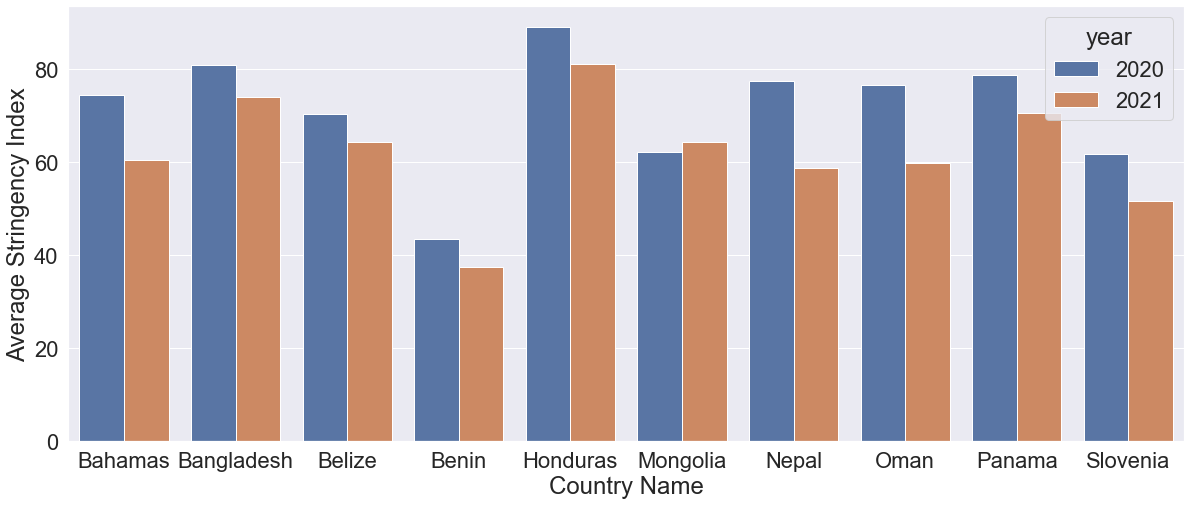

In [4]:
data = pd.read_csv("./result/junqich_si618_project_q2-1.csv", header=None) \
         .rename(columns={0: "country", 1: "year", 2: "stringency_index"})
random.seed(5)
sample_countries = random.sample(set(data["country"]), 10)
sample_data = data[[(c in sample_countries) for c in data["country"]]]

plt.figure(figsize=(20,8))
ax = sns.barplot(x="country", 
                 y="stringency_index", 
                 hue="year", 
                 data=sample_data)
ax.set(xlabel='Country Name', ylabel='Average Stringency Index')
fig = ax.get_figure()
fig.savefig("./figure/Q2-1.png")

### Q2-2: Is a higher vaccination rate related to relaxation on the COVID policies in a country?

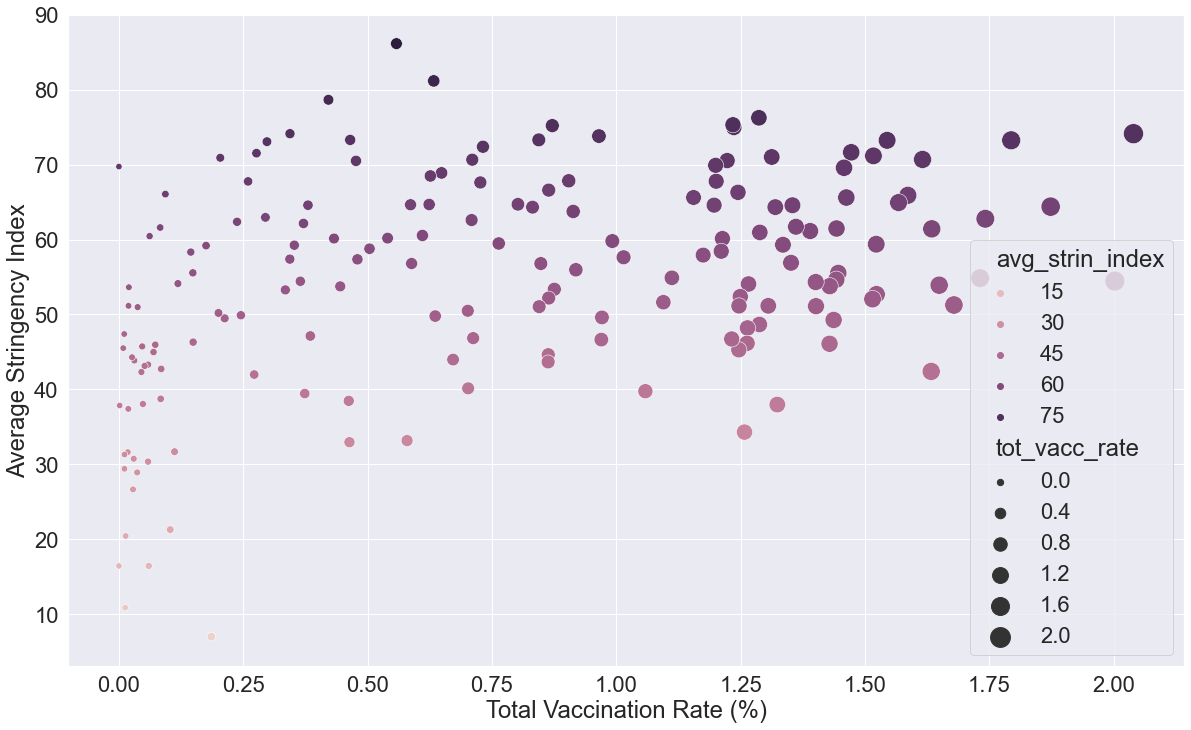

In [5]:
data = pd.read_csv("./result/junqich_si618_project_q2-2.csv", header=None) \
         .rename(columns={0: "country", 1: "year", 2: "avg_strin_index", 3: "tot_vacc_rate_ppm"})
data["tot_vacc_rate"] = np.array(list(map(float, [n if n != "None" else "0" for n in data["tot_vacc_rate_ppm"]]))) / 1000000

plt.figure(figsize=(20,12))
ax = sns.scatterplot(x="tot_vacc_rate", 
                     y="avg_strin_index",
                     data=data, 
                     size="tot_vacc_rate",
                     sizes=(40, 400),
                     hue=data["avg_strin_index"])
ax.set(xlabel='Total Vaccination Rate (%)', ylabel='Average Stringency Index')
fig = ax.get_figure()
fig.savefig("./figure/Q2-2.png")

## Question 3: New cases rate and vaccination rate¶
Is the COVID infection cases promote people’s willingness to get vaccinated?

### Q3-1: Is a higher COVID inflection rate results in more people to get vaccinated in a month?

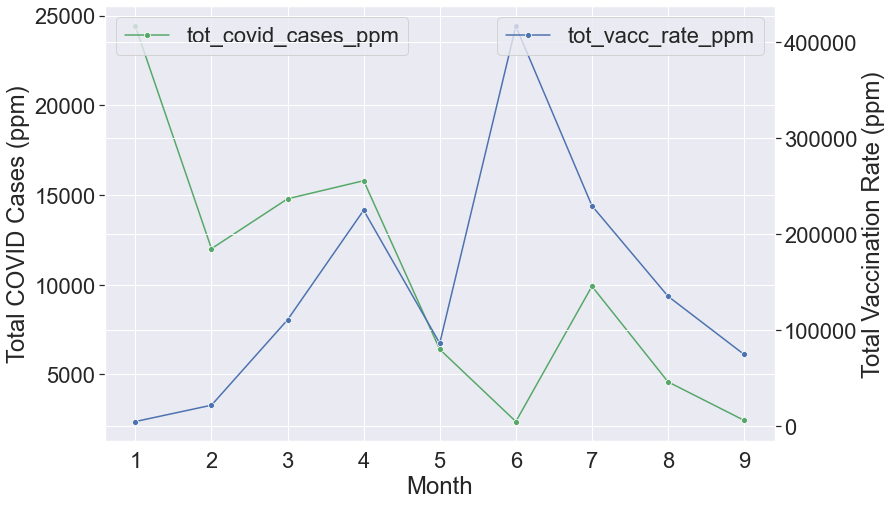

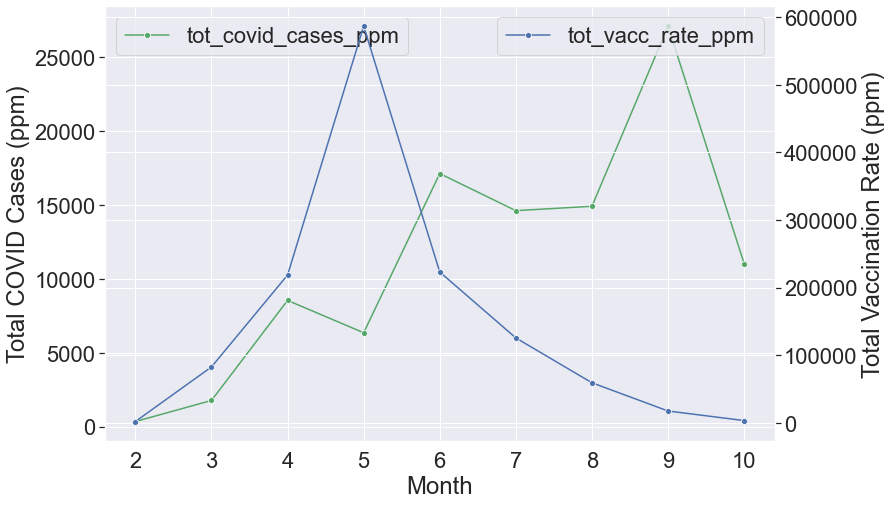

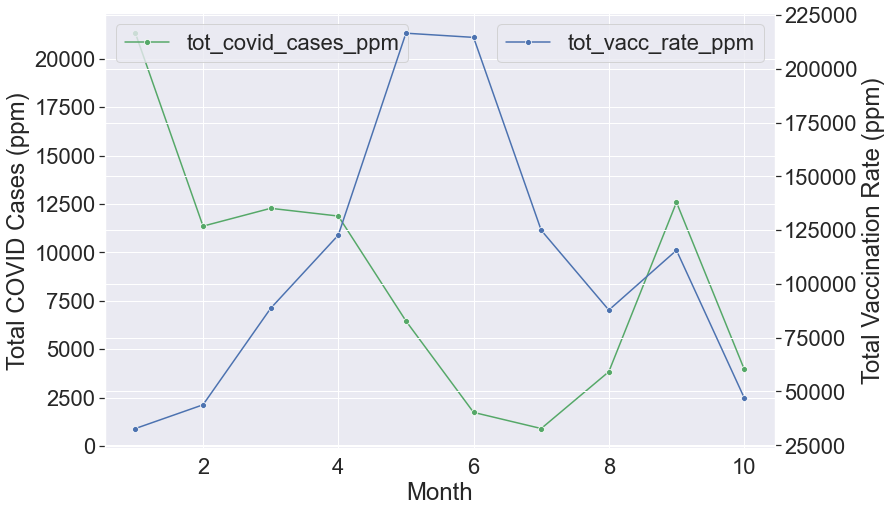

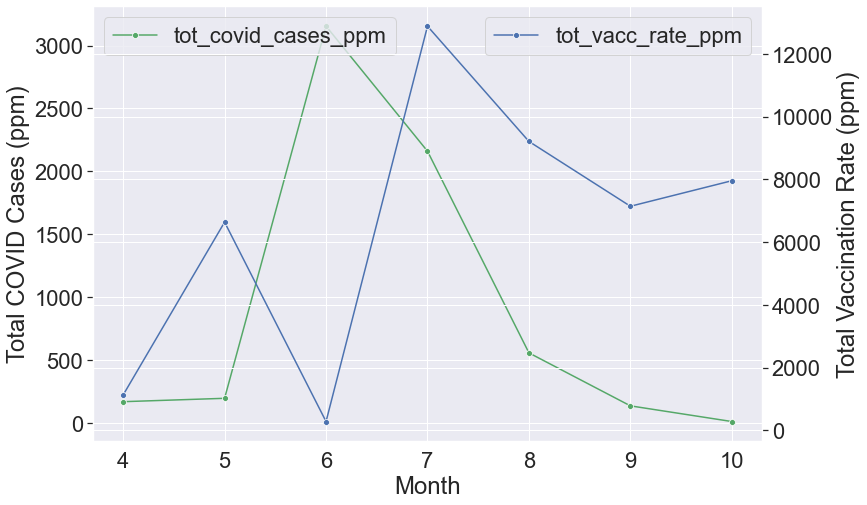

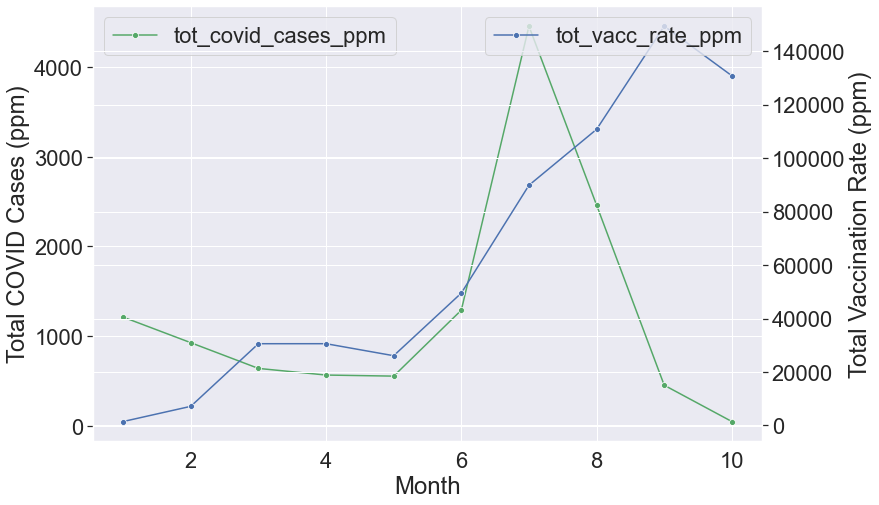

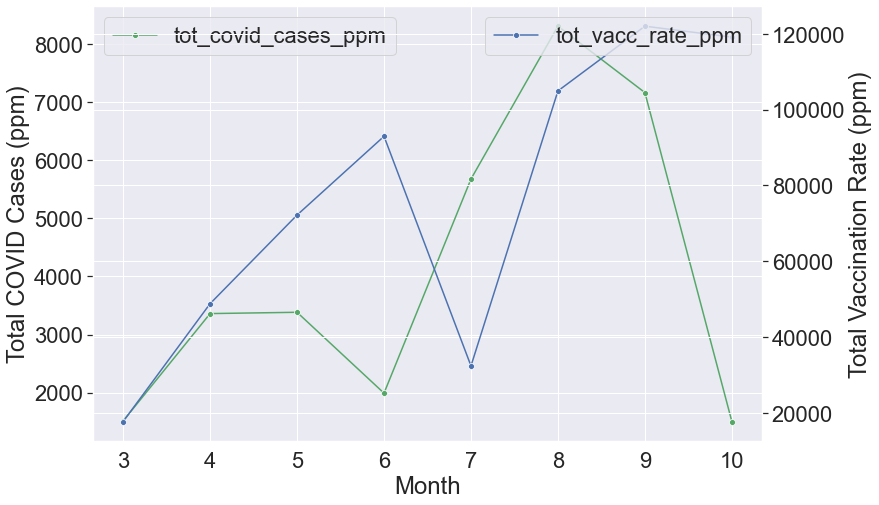

In [6]:
data = pd.read_csv("./result/junqich_si618_project_q3-1.csv", header=None) \
         .rename(columns={0: "country", 1: "year", 2: "month", 3: "tot_covid_cases_ppm", 4: "tot_vacc_rate_ppm"})
random.seed(5)
sample_countries = random.sample(set(data["country"]), 6)
sample_data = data[[(c in sample_countries) for c in data["country"]]]

def my_twolines_plot(data, country_name):
    plt.figure(figsize=(12,8))
    ax = sns.lineplot(x = "month",y = "tot_covid_cases_ppm", data=data, 
                      marker="o", color="g")
    ax2 = sns.lineplot(x = "month",y = "tot_vacc_rate_ppm", data=data, 
                       marker="o", color="b", ax=plt.twinx())
    ax.legend(["tot_covid_cases_ppm"], loc='upper left')
    ax2.legend(["tot_vacc_rate_ppm"], loc='upper right')
    ax.set(xlabel='Month', ylabel='Total COVID Cases (ppm)')
    ax2.set(xlabel='Month', ylabel='Total Vaccination Rate (ppm)')
    fig = ax2.get_figure()
    fig.savefig("./figure/Q3-1_" + country_name + ".png")

for i in range(len(sample_countries)):
    my_twolines_plot(sample_data[sample_data["country"] == sample_countries[i]], 
                     sample_countries[i])

### Q3-2: Is a higher COVID inflection rate results in more people to get vaccinated for each country within a year?  

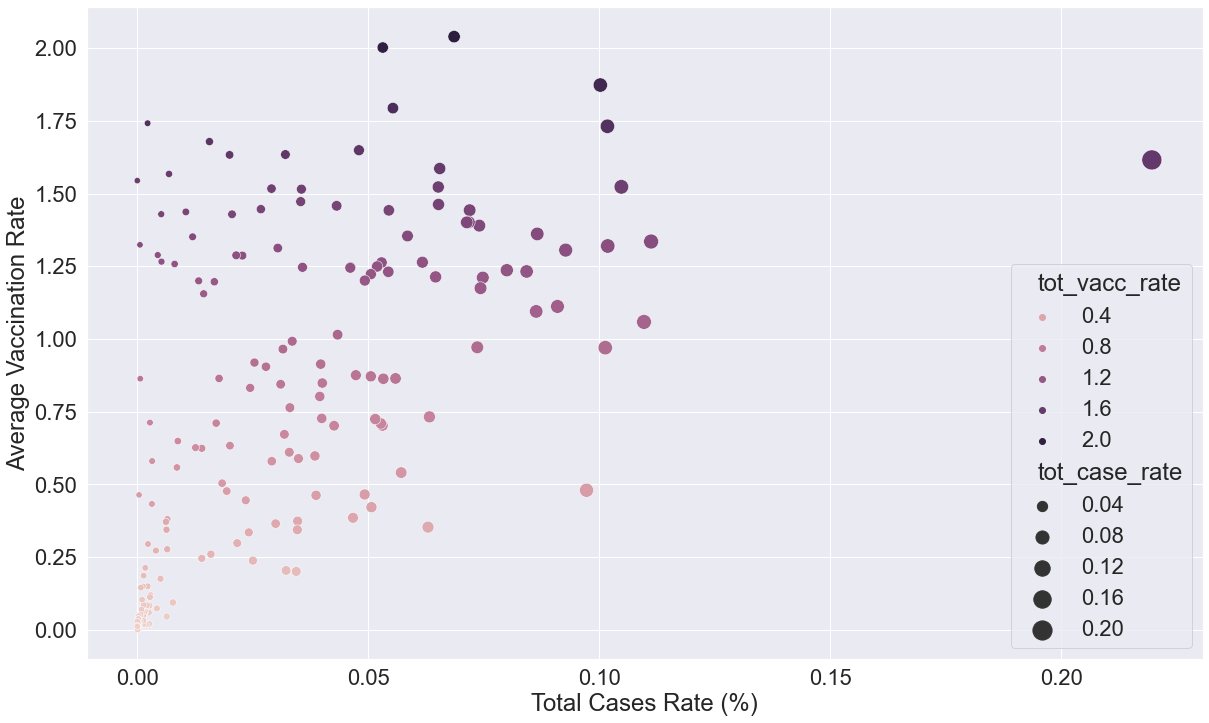

In [7]:
data = pd.read_csv("./result/junqich_si618_project_q3-2.csv", header=None) \
         .rename(columns={0: "country", 1: "year", 2: "tot_covid_cases_ppm", 3: "tot_vacc_rate_ppm"})
data["tot_vacc_rate"] = np.array(list(map(float, [n if n != "None" else "0" for n in data["tot_vacc_rate_ppm"]]))) / 1000000
data["tot_case_rate"] = np.array(list(map(float, [n if n != "None" else "0" for n in data["tot_covid_cases_ppm"]]))) / 1000000

plt.figure(figsize=(20,12))
ax = sns.scatterplot(x="tot_case_rate", 
                     y="tot_vacc_rate",
                     data=data, 
                     size="tot_case_rate",
                     sizes=(40, 400),
                     hue=data["tot_vacc_rate"])
ax.set(xlabel='Total Cases Rate (%)', ylabel='Average Vaccination Rate')
fig = ax.get_figure()
fig.savefig("./figure/Q3-2.png")